In [1]:
from UTILITY_quickstart import *

with open('setLattice_defaults.yml', 'r') as file:
    importedDefaultSettings = yaml.safe_load(file)

In [2]:
csrTF = True
evalElement = "PENT"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
)

# #Set aside the initial beam for later reference
# trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
# PInit = ParticleGroup(data=tao.bunch_data("L0AFEND"))


#Rescale charge
# newCharge = 1e-12
# trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
# P = getBeamAtElement(tao, "L0AFEND")
# print(f"""\n\n\nAs imported charge: {P.charge}""")
# P.charge = newCharge
# makeBeamActiveBeamFile(P)
# tao.cmd('reinit beam')

#Set aside the initial beam for later reference
trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
PInit = ParticleGroup(data=tao.bunch_data("L0AFEND"))
print(f"""New charge: {PInit.charge}""")

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_defaults.yml
Number of macro particles = 10000.0
Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = L0BFEND
Tracking!
trackBeam() exiting
New charge: 1.600000000000001e-09


In [3]:
# PInit = ParticleGroup("./beams/2024-10-14_Impact_TwoBunch/2024-10-14_TwoBunch.h5")
# makeBeamActiveBeamFile(PInit)

In [4]:
targetBunchSpacing = 150e-6

#masterToleranceScaling = 1.0 #Higher is looser; generally tighten for early sims and loosen for refinement
masterToleranceScalingStart = 1.0
masterToleranceScalingEnd = 1.0
masterToleranceScalingEvolutionSteps = 10000
masterToleranceScaling = masterToleranceScalingStart

stageOneOptimization    = 0  # Disabling transverse terms and length limits, per https://docs.google.com/presentation/d/1b6WoEwmDz5cA0fm9FbbGiZoMwBcbCNNNCsD7JiFDxRc/edit#slide=id.g2f91233284b_0_0
enableAlignmentTerms    = 0  # Enable centroid offset and angle penalties. Useful for removing final focus kickers from free parameters
enableLongitudinalTerms = 1  # Enable bunch spacing penalty and bunch length objectives 

usingCheckpoint = False
#checkpointElement = "MFFF"
checkpointElement = "CB1LE" #Shortly downstream of BEGBC20; there's an intervening dipole though
checkpointElementS = tao.ele_param(checkpointElement,"ele.s")['ele_s']
centerBC14 = True 
centerBC20 = True
centerMFFF = True

#If the checkpoint is DOWNSTREAM of the centering location AND you want centering, set True
centerBC14ForCheckpoint = True and (checkpointElementS > tao.ele_param("BEGBC14_1","ele.s")['ele_s'])
centerBC20ForCheckpoint = True and (checkpointElementS > tao.ele_param("BEGBC20","ele.s")['ele_s'])
centerMFFFForCheckpoint = True and (checkpointElementS > tao.ele_param("MFFF","ele.s")['ele_s'])

#If the checkpoint is UPSTREAM of the centering location AND you want centering, set True
centerBC14ForRemainder = centerBC14 and not centerBC14ForCheckpoint
centerBC20ForRemainder = centerBC20 and not centerBC20ForCheckpoint
centerMFFFForRemainder = centerMFFF and not centerMFFFForCheckpoint

if usingCheckpoint:
    print(f"Using checkpoint: {checkpointElement}")
    print(f"centerBC14ForCheckpoint = {centerBC14ForCheckpoint}, centerBC20ForCheckpoint = {centerBC20ForCheckpoint}, centerMFFFForCheckpoint = {centerMFFFForCheckpoint}")
    print(f"centerBC14ForRemainder = {centerBC14ForRemainder}, centerBC20ForRemainder = {centerBC20ForRemainder}, centerMFFFForRemainder = {centerMFFFForRemainder}")
else:
    print("No checkpoint. Start to end tracking")
    print(f"centerBC14 = {centerBC14}, centerBC20 = {centerBC20}, centerMFFF = {centerMFFF}")


pbounds = {
    # "QA10361kG": eval(importedDefaultSettings["QA10361kGBounds"]),
    # "QA10371kG": eval(importedDefaultSettings["QA10371kGBounds"]),
    # "QE10425kG": eval(importedDefaultSettings["QE10425kGBounds"]),
    # "QE10441kG": eval(importedDefaultSettings["QE10441kGBounds"]),
    # "QE10511kG": eval(importedDefaultSettings["QE10511kGBounds"]),
    # "QE10525kG": eval(importedDefaultSettings["QE10525kGBounds"]),

    # 'L0BPhaseSet': (-30, 30),
    'L1PhaseSet': (-60, 0),
    'L2PhaseSet': (-60, 0),
    # 'L3PhaseSet': (-65, 0),
    
    # 'L0BEnergyOffset': (-5e6, 5e6),
    # 'L1EnergyOffset': (-20e6, 20e6),
    # 'L2EnergyOffset': (-500e6, 500e6),
    # 'L3EnergyOffset': (-500e6, 500e6),

    # "Q1EkG":  eval(importedDefaultSettings["Q1EkGBounds"]),
    # "Q2EkG":  eval(importedDefaultSettings["Q2EkGBounds"]),
    # "Q3EkG":  eval(importedDefaultSettings["Q3EkGBounds"]),
    # "Q4EkG":  eval(importedDefaultSettings["Q4EkGBounds"]),
    # "Q5EkG":  eval(importedDefaultSettings["Q5EkGBounds"]),
    # "Q6EkG":  eval(importedDefaultSettings["Q6EkGBounds"]),
    
    "S1ELkG": eval(importedDefaultSettings["S1ELkGBounds"]),
    "S2ELkG": eval(importedDefaultSettings["S2ELkGBounds"]),
    "S3ELkG": eval(importedDefaultSettings["S3ELkGBounds"]),
    # "S3ERkG": eval(importedDefaultSettings["S3ERkGBounds"]),
    # "S2ERkG": eval(importedDefaultSettings["S2ERkGBounds"]),
    # "S1ERkG": eval(importedDefaultSettings["S1ERkGBounds"]),

    "S1EL_xOffset" : ( -0.004, 0.004 ),  
    "S1EL_yOffset" : ( -0.004, 0.004 ),  
    "S2EL_xOffset" : ( -0.004, 0.004 ),  
    "S2EL_yOffset" : ( -0.004, 0.004 ),  
    "S2ER_xOffset" : ( -0.004, 0.004 ),  
    "S2ER_yOffset" : ( -0.004, 0.004 ),  
    "S1ER_xOffset" : ( -0.004, 0.004 ),  
    "S1ER_yOffset" : ( -0.004, 0.004 ),

    # # 'Q5FFkG': eval(importedDefaultSettings["Q5FFkGBounds"]),
    # # 'Q4FFkG': eval(importedDefaultSettings["Q4FFkGBounds"]),
    # # 'Q3FFkG': eval(importedDefaultSettings["Q3FFkGBounds"]),
    # # 'Q2FFkG': eval(importedDefaultSettings["Q2FFkGBounds"]),
    # # 'Q1FFkG': eval(importedDefaultSettings["Q1FFkGBounds"]),
    # # 'Q0FFkG': eval(importedDefaultSettings["Q0FFkGBounds"]),
    # # # 'Q0DkG':  eval(importedDefaultSettings["Q0DkGBounds"]),
    # # # 'Q1DkG':  eval(importedDefaultSettings["Q1DkGBounds"]),
    # # # 'Q2DkG':  eval(importedDefaultSettings["Q2DkGBounds"]),

    # "XC1FFkG" : tuple(2 * x for x in eval(importedDefaultSettings["XC1FFkGBounds"])), #2024-10-11: Extending bounds as proxy for tuning final chicane dipole strength
    # "XC3FFkG" : eval(importedDefaultSettings["XC3FFkGBounds"]),
    # "YC1FFkG" : eval(importedDefaultSettings["YC1FFkGBounds"]),
    # "YC2FFkG" : eval(importedDefaultSettings["YC2FFkGBounds"]),
}

No checkpoint. Start to end tracking
centerBC14 = True, centerBC20 = True, centerMFFF = True


# Optimization

## Utility functions

In [5]:
# #2024-08-23: Now to IM1988 to enable centering at BC20
# def propagateToBEGBC20(): 

#     ##################################
#     #Propagate to BEGBC20 and save result
#     ##################################
#     makeBeamActiveBeamFile(PInit)
    

#     trackBeam(tao, trackStart = "L0AFEND", trackEnd = "IM1988", centerBC14 = True, verbose = True)

#     P = ParticleGroup(data=tao.bunch_data("IM1988"))
    
#     makeBeamActiveBeamFile(P)

#     return


#Generalizing
def propagateFromStartToCheckpoint(
    checkpointElement,
    centerBC14,
    centerBC20,
    centerMFFF
): 
    makeBeamActiveBeamFile(PInit)

    trackBeam(tao, trackStart = "L0AFEND", trackEnd = checkpointElement, centerBC14 = centerBC14, centerBC20 = centerBC20, centerMFFF = centerMFFF, verbose = False)

    P = ParticleGroup(data=tao.bunch_data(checkpointElement))
    
    makeBeamActiveBeamFile(P)

    return

## Optimizer functions

In [6]:
if usingCheckpoint:
    setLattice(tao) #Set lattice to current default config
    propagateFromStartToCheckpoint(checkpointElement, centerBC14ForCheckpoint, centerBC20ForCheckpoint, centerMFFFForCheckpoint)

def rampToZero(val, thresh, scale = 1):
    return (max(val, thresh) - thresh) / scale

def rampToZeroFlip(val, thresh, scale = 1):
    #This ensures some minimum val is reached and linearly penalizes values which are lower
    return (max( -1 * val, -1 * thresh) + thresh) / scale


def updateMasterToleranceScaling(totalNumEvals):
    """
    I'm not sure if this is actually a good idea or not. 
    The general idea I'm aiming for is that early optimization iterations will get closer to the thresholded constraints than strictly necessary, 
    allowing later optimization to proceed with more wiggle room and less likelihood of falling off a "cliff".
    Maybe it'd make more sense to make this conditional on something other than evaluation count?
    Alternatively, what if it's useful to start with looser constraints and gradually tighten them? For something like COBYQA, it's less likely to "overlearn" when trying to satisfy, e.g. the first condition
    An insane person might try using an exponentially decaying sine to try both...
    """
    
    global masterToleranceScaling

    if totalNumEvals < masterToleranceScalingEvolutionSteps: 
        masterToleranceScaling = masterToleranceScalingStart + (masterToleranceScalingEnd - masterToleranceScalingStart) * totalNumEvals / masterToleranceScalingEvolutionSteps
    else:
        masterToleranceScaling = masterToleranceScalingEnd
    
    return



def specificOptimizer(
    self,
    **kwargs
):

    self.totalNumEvals += 1
    self.displayEvals()

    updateMasterToleranceScaling(self.totalNumEvals)

    
    savedData = kwargs
    
    badValue = -1e30  #The value returned for illegal config. Should be colossal. Double limit ~= 1e308
    bigCost  = 1e20   #Should be large enough to dominate any "normal" return value but be dominated by badValue
    
    try: #This try block deals with bad configurations. Instead of causing the optimizer to halt we now 'except' a low value
        setLattice(tao, **kwargs)

    except:
        print(f"specificOptimizer() excepted'd on setLattice()")
        return badValue * 5

    try:
        if usingCheckpoint: 
            trackBeam(tao, trackStart = checkpointElement, trackEnd = evalElement, centerBC14 = centerBC14ForRemainder, centerBC20 = centerBC20ForRemainder, centerMFFF = centerMFFFForRemainder, verbose = False)
        else:
            trackBeam(tao, trackStart = "L0AFEND", trackEnd = evalElement, centerBC14 = centerBC14, centerBC20 = centerBC20, centerMFFF = centerMFFF, verbose = False)

    except:
            print(f"specificOptimizer() excepted'd on trackBeam()")
            return badValue * 4
    

    #BEGBC20NumLiveParticles = tao.bunch_params("BEGBC20")['n_particle_live']
    #PENTNumLiveParticles = tao.bunch_params("PENT")['n_particle_live']

    if tao.bunch_params(evalElement)['n_particle_live'] < 10:
        print(f"specificOptimizer() got ~no particles after tracking")
        return badValue * 2 

    

    
    try: 
        P = getBeamAtElement(tao, evalElement)
        #PDrive, PWitness = getDriverAndWitness(P)
        PDrive = P.copy()
    

        for PActiveStr in ["PDrive"]: #["PDrive", "PWitness"]: #, "PSystem"]:
            PActive = locals()[PActiveStr]
            for val in ["mean_x", "mean_y", "sigma_x", "sigma_y", "mean_xp", "mean_yp"]:
                savedData[f"{PActiveStr}_{val}"] = PActive[val]
                #print(f"""{PActiveStr}_{val} = {PActive[val]}""")


            savedData[f"{PActiveStr}_median_x"] = np.median(PActive.x)
            savedData[f"{PActiveStr}_median_y"] = np.median(PActive.y)

            savedData[f"{PActiveStr}_median_xp"] = np.median(PActive.xp)
            savedData[f"{PActiveStr}_median_yp"] = np.median(PActive.yp)
            
            savedData[f"{PActiveStr}_sigmaSI90_x"] = smallestIntervalImpliedSigma(PActive.x, percentage = 0.90)
            savedData[f"{PActiveStr}_sigmaSI90_y"] = smallestIntervalImpliedSigma(PActive.y, percentage = 0.90)
            savedData[f"{PActiveStr}_sigmaSI90_z"] = smallestIntervalImpliedSigma(PActive.t * 3e8, percentage=0.9)

            savedData[f"{PActiveStr}_sigmaSI90_xp"] = smallestIntervalImpliedSigma(PActive.xp, percentage = 0.90)
            savedData[f"{PActiveStr}_sigmaSI90_yp"] = smallestIntervalImpliedSigma(PActive.yp, percentage = 0.90)

            savedData[f"{PActiveStr}_emitSI90_x"] = smallestIntervalImpliedEmittance(PActive, plane = "x", percentage = 0.90)
            savedData[f"{PActiveStr}_emitSI90_y"] = smallestIntervalImpliedEmittance(PActive, plane = "y", percentage = 0.90)

            savedData[f"{PActiveStr}_norm_emit_x"] = PActive["norm_emit_x"]
            savedData[f"{PActiveStr}_norm_emit_y"] = PActive["norm_emit_y"]

            #savedData[f"{PActiveStr}_zLen"] = smallestIntervalImpliedSigma(PActive.t * 3e8, percentage=0.9)

            savedData[f"{PActiveStr}_zCentroid"] = np.median(PActive.t * 3e8)

            savedData[f"{PActiveStr}_charge_nC"] = PActive.charge * 1e9

        # savedData["bunchSpacing"] = savedData["PWitness_zCentroid"] - savedData["PDrive_zCentroid"]

        # savedData["transverseCentroidOffset"] = np.sqrt(
        #         (savedData["PDrive_mean_x"] - savedData["PWitness_mean_x"])**2 + 
        #         (savedData["PDrive_mean_y"] - savedData["PWitness_mean_y"])**2
        #     )

        
        #savedData["lostChargeFraction"] = 1 - (tao.bunch_params("DTOTR")['n_particle_live'] / tao.bunch_params("BEGBC20")['n_particle_live'])
        savedData["lostChargeFraction"] = 1 - (P.charge / PInit.charge)

        if evalElement == "MFFF":
            #MFFF lucretia live model lattice 2024-10-16
            targetBetaX = 11.6
            targetBetaY = 25.2
            targetAlphaX = -0.64
            targetAlphaY = -1.6

        if evalElement == "PENT":
            #These are the wishful twiss specs
            targetBetaX = 0.5
            targetBetaY = 0.5
            targetAlphaX = 0.0
            targetAlphaY = 0.0

        PDriveTwiss = PDrive.twiss(plane = "x", fraction = 0.9) | PDrive.twiss(plane = "y", fraction = 0.9)
        
        savedData[f"PDrive_BMAG_x"] = calcBMAG(targetBetaX, targetAlphaX, PDriveTwiss["beta_x"], PDriveTwiss["alpha_x"])
        savedData[f"PDrive_BMAG_y"] = calcBMAG(targetBetaY, targetAlphaY, PDriveTwiss["beta_y"], PDriveTwiss["alpha_y"])

        # Get BMAGs by energy slice
        slicedBeamlets = sliceBeam( PDrive , sortKey = "pz", numBeamlets = 5 )

        slicedTwiss =  [ ( beamlet.twiss(plane = "x", fraction = 0.9) | beamlet.twiss(plane = "y", fraction = 0.9) ) for beamlet in slicedBeamlets ] 
        
        savedData[f"sliced_BMAG_x"] = [ calcBMAG(targetBetaX, targetAlphaX, beamletTwiss["beta_x"], beamletTwiss["alpha_x"]) for beamletTwiss in slicedTwiss ]
        savedData[f"sliced_BMAG_y"] = [ calcBMAG(targetBetaY, targetAlphaY, beamletTwiss["beta_y"], beamletTwiss["alpha_y"]) for beamletTwiss in slicedTwiss ]
            
            

    except:
        print(f"specificOptimizer() excepted'd while getting beam and compiling savedData")
        return badValue


    if stageOneOptimization: 
        enableTransverse = 0
        lengthLimitMultiplier = 0
        stageOneSpacingToleranceMultiplier = 0.5

    else:
        enableTransverse = 1
        lengthLimitMultiplier = 1

    

    
    tolerableBeamLossFraction  = 0.02  * masterToleranceScaling
    tolerableBunchSpacingError = 100e-6 * masterToleranceScaling * (stageOneSpacingToleranceMultiplier if stageOneOptimization else 1.0)
    
    tolerableBeamOffset  = 5e-6 * masterToleranceScaling
    tolerableAngleOffset = 5e-3 * masterToleranceScaling
    

    driveEmittanceThreshold   = 30e-6 * masterToleranceScaling
    witnessEmittanceThreshold = 20e-6 * masterToleranceScaling

    driveSpotThreshold     = 20e-6 #* masterToleranceScaling
    witnessSpotThreshold   = 30e-6 #* masterToleranceScaling
    
    driveLengthThreshold   = lengthLimitMultiplier * 20e-6 #* masterToleranceScaling
    witnessLengthThreshold = lengthLimitMultiplier * 20e-6 #* masterToleranceScaling

    slicewiseBMAGThreshold = 1 + ( 0.2 * masterToleranceScaling ) #1.1
    

    savedData["errorTerm_lostChargeFraction"] = 1e3 * rampToZero( savedData["lostChargeFraction"], tolerableBeamLossFraction, scale = 0.01)**2
    
    #savedData["errorTerm_bunchSpacing"] = enableLongitudinalTerms * 1e3 * rampToZero( abs(savedData["bunchSpacing"] - targetBunchSpacing), tolerableBunchSpacingError, scale = 10e-6)**2
    
    savedData["errorTerm_transverseOffset"] = enableAlignmentTerms * enableTransverse * 1e3 * np.mean([
                #rampToZero(abs(savedData["PWitness_median_x"]), tolerableBeamOffset, scale = 1e-6) ** 2,
                #rampToZero(abs(savedData["PWitness_median_y"]), tolerableBeamOffset, scale = 1e-6) ** 2,
                rampToZero(abs(savedData["PDrive_median_x"]  ), tolerableBeamOffset, scale = 1e-6) ** 2,
                rampToZero(abs(savedData["PDrive_median_y"]  ), tolerableBeamOffset, scale = 1e-6) ** 2,
    ])
    
    savedData["errorTerm_angleOffset"] = enableAlignmentTerms * enableTransverse * 1e3 * np.mean([
                #rampToZero(abs(savedData["PWitness_median_xp"]), tolerableAngleOffset, scale = 100e-6) ** 2,
                #rampToZero(abs(savedData["PWitness_median_yp"]), tolerableAngleOffset, scale = 100e-6) ** 2,
                rampToZero(abs(savedData["PDrive_median_xp"]  ), tolerableAngleOffset, scale = 100e-6) ** 2,
                rampToZero(abs(savedData["PDrive_median_yp"]  ), tolerableAngleOffset, scale = 100e-6) ** 2,
    ])
    
    # savedData["errorTerm_mainObjective"] = max([
    #             savedData[f"PDrive_sigmaSI90_x"],savedData[f"PDrive_sigmaSI90_y"],savedData[f"PDrive_zLen"],
    #             savedData[f"PWitness_sigmaSI90_x"],savedData[f"PWitness_sigmaSI90_y"],savedData[f"PWitness_zLen"]
    # ]) / 10e-6

    #2024-11-25-15-58-15: A desperate, ad hoc move... Trying to prevent optimizer from "rolling up" phase space at PENT
    #savedData["errorTerm_sigma_xp_rule"] = 1e3 * ( rampToZeroFlip(savedData[f"PDrive_sigmaSI90_xp"], 500e-6, 10e-6) ) ** 2

    #2024-11-26-12-38-20: More desperation; force the beam at MFFF to match design twiss
    #savedData["errorTerm_BMAG_rule"] = 1e3 * ( rampToZero(savedData[f"PDrive_BMAG_x"], 1.1, 1) + rampToZero(savedData[f"PDrive_BMAG_y"], 1.1, 1)) ** 2
    #2024-11-27-10-11-23: Require each slice to comply

    # savedData["errorTerm_BMAG_rule"] = enableTransverse * 1e3 * (
    #     np.sum([rampToZero(activeBMAG, slicewiseBMAGThreshold, 1) ** 2 for activeBMAG in savedData[f"sliced_BMAG_x"]]) + 
    #     np.sum([rampToZero(activeBMAG, slicewiseBMAGThreshold, 1) ** 2 for activeBMAG in savedData[f"sliced_BMAG_y"]])
    # )

    
    savedData["errorTerm_mainObjective"] = np.mean([
                enableTransverse *        rampToZero(savedData[f"PDrive_sigmaSI90_x"],   driveSpotThreshold,     10e-6) ** 2,
                enableTransverse *        rampToZero(savedData[f"PDrive_sigmaSI90_y"],   driveSpotThreshold,     10e-6) ** 2,
                enableLongitudinalTerms * rampToZero(savedData[f"PDrive_sigmaSI90_z"],   driveLengthThreshold,   10e-6) ** 2,

                #enableTransverse *                          rampToZero(savedData[f"PWitness_sigmaSI90_x"], witnessSpotThreshold,   10e-6) ** 2,
                #enableTransverse *                          rampToZero(savedData[f"PWitness_sigmaSI90_y"], witnessSpotThreshold,   10e-6) ** 2,
                #enableLongitudinalTerms *                   rampToZero(savedData[f"PWitness_sigmaSI90_z"], witnessLengthThreshold, 10e-6) ** 2,

                # rampToZero(savedData[f"PDrive_emitSI90_x"], 0, 10e-6) ** 2,
                # rampToZero(savedData[f"PDrive_emitSI90_y"], 0, 10e-6) ** 2,

                # rampToZero(savedData[f"PDrive_norm_emit_x"], 0, 10e-6) ** 2,
                # rampToZero(savedData[f"PDrive_norm_emit_y"], 0, 10e-6) ** 2,

                #enableTransverse * rampToZero(savedData[f"PDrive_norm_emit_x"] * savedData[f"PDrive_BMAG_x"], driveEmittanceThreshold, 10e-6) ** 2,
                #enableTransverse * rampToZero(savedData[f"PDrive_norm_emit_y"] * savedData[f"PDrive_BMAG_y"], driveEmittanceThreshold, 10e-6) ** 2,
    ]) 

    #Secondary objective includes all "ramp" terms with thresholds disabled. Intended to gently nudge all specs to better values if nothing else is going on; mostly expect this to do anything once thresholds are hit
    #2024-10-15 comment: Advise not setting this weight above 1e-6. For quite-good mainObjective settings, even 1e-4 is too much
    savedData["errorTerm_secondaryObjective"] = 1e-6 * np.mean([
                #rampToZero( abs(savedData["bunchSpacing"] - targetBunchSpacing), 0 * tolerableBunchSpacingError, scale = 10e-6)**2,
        
                #rampToZero(abs(savedData["PWitness_median_x"]),                  0 * tolerableBeamOffset, scale = 1e-6) ** 2,
                #rampToZero(abs(savedData["PWitness_median_y"]),                  0 * tolerableBeamOffset, scale = 1e-6) ** 2,
                rampToZero(abs(savedData["PDrive_median_x"]  ),                  0 * tolerableBeamOffset, scale = 1e-6) ** 2,
                rampToZero(abs(savedData["PDrive_median_y"]  ),                  0 * tolerableBeamOffset, scale = 1e-6) ** 2,

                #rampToZero(abs(savedData["PWitness_median_xp"]),                 0 * tolerableAngleOffset, scale = 100e-6) ** 2,
                #rampToZero(abs(savedData["PWitness_median_yp"]),                 0 * tolerableAngleOffset, scale = 100e-6) ** 2,
                rampToZero(abs(savedData["PDrive_median_xp"]  ),                 0 * tolerableAngleOffset, scale = 100e-6) ** 2,
                rampToZero(abs(savedData["PDrive_median_yp"]  ),                 0 * tolerableAngleOffset, scale = 100e-6) ** 2,

                rampToZero(savedData[f"PDrive_sigmaSI90_x"],                     0 * driveSpotThreshold,     10e-6) ** 2,
                rampToZero(savedData[f"PDrive_sigmaSI90_y"],                     0 * driveSpotThreshold,     10e-6) ** 2,
                rampToZero(savedData[f"PDrive_sigmaSI90_z"],                     0 * driveLengthThreshold,   10e-6) ** 2,
                #rampToZero(savedData[f"PWitness_sigmaSI90_x"],                   0 * witnessSpotThreshold,   10e-6) ** 2,
                #rampToZero(savedData[f"PWitness_sigmaSI90_y"],                   0 * witnessSpotThreshold,   10e-6) ** 2,
                #rampToZero(savedData[f"PWitness_sigmaSI90_z"],                   0 * witnessLengthThreshold, 10e-6) ** 2,
    ])
    
    savedData["maximizeMe"] = 1 / np.mean([
        savedData["errorTerm_lostChargeFraction"], 
        #savedData["errorTerm_bunchSpacing"],
        savedData["errorTerm_transverseOffset"],
        savedData["errorTerm_angleOffset"],
        #savedData["errorTerm_sigma_xp_rule"],
        # savedData["errorTerm_BMAG_rule"],
        savedData["errorTerm_mainObjective"],
        savedData["errorTerm_secondaryObjective"],
        1e-20 #Avoid infinities 
    ])

    savedData["inputBeamFilePathSuffix"] = inputBeamFilePathSuffix
    savedData["csrTF"] = csrTF
    

    
    #Collect desired data as a pandas Series
    tmpData = pd.Series( savedData ) 
    self.history = pd.concat([self.history, tmpData.to_frame().T])

    #Optional: Write to file
    #self.history.to_json('optimizerHistory.json', orient='records')
    n = self.totalNumEvals
    if (n < 100) or (n < 1000 and  n % 10 == 0) or (n % 100 == 0): #This gets expensive to write when n >> 10k
        self.history.to_json('optimizerHistory.json', orient='records')
    
    self.updatePlot()

    
    


    sortedHistory = self.history.sort_values(by='maximizeMe', ascending=False)
    bestConfigData = sortedHistory.iloc[0]

    #Optionally: Write beams for running best case
    if savedData["maximizeMe"] == bestConfigData["maximizeMe"]:
        (getBeamAtElement(tao, "MFFF")).write("optimizerRunningBestBeam_MFFF.h5")
        (getBeamAtElement(tao, "PENT")).write("optimizerRunningBestBeam_PENT.h5")


    
    return savedData["maximizeMe"]




# Function to create optimizerWrapper based on pbounds
def create_optimizer_wrapper(pbounds):
    param_names = list(pbounds.keys())
    
    def optimizerWrapper(self, **kwargs):
        params = {name: kwargs.get(name, None) for name in param_names}
        if None in params.values():
            raise ValueError("All parameters must be provided")
        return specificOptimizer(self, **params)
    
    return optimizerWrapper

# Create the optimizerWrapper function
optimizerWrapper = create_optimizer_wrapper(pbounds)

### General optimizer setup

In [7]:
class OptimizationProblem:
    def __init__(self):
        self.history = pd.DataFrame()
        self.totalNumEvals = 0
        self.plot_display_handle = None
        self.evals_display_handle = None


    def updatePlot(self):
        #This function seems to cause a substantial memory leak. During "normal" optimization it doesn't matter
        #However, if >>10k iterations are expected, probably want to disable or otherwise resolve

        n = self.totalNumEvals
        
        if (n < 100) or (n < 1000 and  n % 10 == 0) or (n % 100 == 0): 
            plt.figure()
            plotKey = "maximizeMe"
            plt.plot(np.arange(len(self.history[plotKey])), self.history[plotKey], '-')
            
            plt.title('Optimization History')
            plt.xlabel('Evaluation #')
            plt.ylabel(plotKey)
            plt.yscale('log')
            plt.grid(True)
            
            
            if self.plot_display_handle is None:
                self.plot_display_handle = display(plt.gcf(), display_id=True)
            else:
                update_display(plt.gcf(), display_id=self.plot_display_handle.display_id)
            plt.close()

        return

    def displayEvals(self):
        if self.evals_display_handle is None:
            self.evals_display_handle = display(f"Total Num Evals: {self.totalNumEvals}", display_id=True)
        else:
            #Can't use '\n' in this context. <br> doesn't work either
            update_display(f"Total Num Evals: {self.totalNumEvals}, masterToleranceScaling: {masterToleranceScaling}", display_id=self.evals_display_handle.display_id)

# Attach the function to the class as a method
OptimizationProblem.optimizerWrapper = optimizerWrapper

# Instantiate the optimization problem
problem = OptimizationProblem()

In [8]:
from scipy.optimize import differential_evolution

# Convert pbounds to the format required by differential_evolution
bounds = [(low, high) for (low, high) in pbounds.values()]
param_names = list(pbounds.keys())

#scipy.optimize wants to optimize a function which is passed a vector of all the parameters
#This programmatically wraps the existing wrapper (ugh...) to handle this format
def create_DE_wrapper(obj, param_names):
    def wrapperDE(params):
        param_dict = dict(zip(param_names, params))

        #bayes_opt is a maximizer but differential_evolution is a minimizer... hence the inversion
        return -1*obj.optimizerWrapper(**param_dict)
    
    return wrapperDE

wrapperDE = create_DE_wrapper(problem, param_names)

In [9]:
defaultSettingsVector = [importedDefaultSettings[key] for key in list(pbounds.keys())]

## Run optimizer

In [10]:
from IPython.display import HTML, display

if usingCheckpoint:
    display(HTML(f'<span style="color: red; font-size: 18px;">Checkpoint enabled: {checkpointElement}</span>'))
else:
    display(HTML('<span style="color: green; font-size: 18px;">No checkpoint. Start-to-end simulation</span>'))

if masterToleranceScalingStart == masterToleranceScalingEnd == 1.0:
    display(HTML('<span style="color: green; font-size: 18px;">No masterToleranceScaling</span>'))
else:
    display(HTML('<span style="color: red; font-size: 18px;">masterToleranceScaling is changing</span>'))

if csrTF:
    display(HTML('<span style="color: green; font-size: 18px;">CSR enabled</span>'))
else:
    display(HTML('<span style="color: red; font-size: 18px;">CSR disabled</span>'))

if evalElement == "PENT":
    display(HTML('<span style="color: green; font-size: 18px;">Evaluation at PENT</span>'))
else:
    display(HTML(f'<span style="color: red; font-size: 18px;">Evaluation at {evalElement}, not PENT</span>'))

if stageOneOptimization:
    display(HTML('<span style="color: red; font-size: 18px;">Stage 1 optimization disables spot size, angle, and offset penalties </span>'))

if not enableAlignmentTerms:
    display(HTML('<span style="color: red; font-size: 18px;">Offset and angle penalties disabled</span>'))

    if centerMFFF:
        display(HTML('<span style="color: orange; font-size: 18px;">---However, centerMFFF is on</span>'))

if not enableLongitudinalTerms:
    display(HTML('<span style="color: red; font-size: 18px;">Bunch spacing and length terms disabled</span>'))

if abs(PInit.charge - 1.6e-9) > 0.05e-9:
    display(HTML(f'<span style="color: red; font-size: 18px;">Atypical charge. {PInit.charge * 1e9} nC not 1.6 nC</span>'))



'Total Num Evals: 1143, masterToleranceScaling: 1.0'

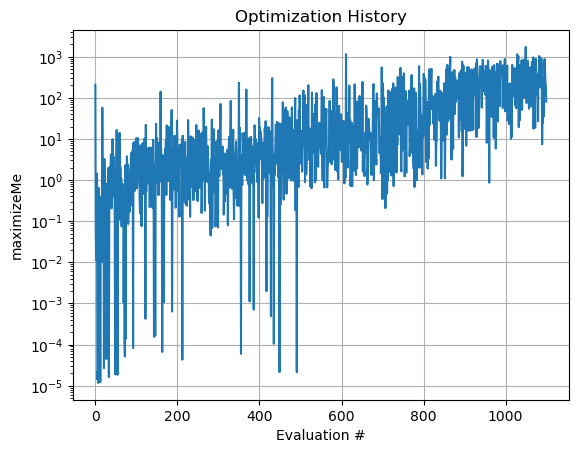

/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:437: RuntimeWarning: invalid value encountered in sqrt
  emit_opt = np.sqrt( sigmax_opt**2 * sigmaxp_opt**2 - (rho_opt * sigmax_opt * sigmaxp_opt)**2 )
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho

differential_evolution step 1: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 2: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 3: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 4: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 5: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:437: RuntimeWarning: invalid value encountered in sqrt
  emit_opt = np.sqrt( sigmax_opt**2 * sigmaxp_opt**2 - (

differential_evolution step 6: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 7: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 8: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 9: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 10: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 11: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 12: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 13: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 14: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 15: f(x)= -206.78444840825318


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:437: RuntimeWarning: invalid value encountered in sqrt
  emit_opt = np.sqrt( sigmax_opt**2 * sigmaxp_opt**2 - (rho_opt * sigmax_opt * sigmaxp_opt)**2 )
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 16: f(x)= -233.31172266411727


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:437: RuntimeWarning: invalid value encountered in sqrt
  emit_opt = np.sqrt( sigmax_opt**2 * sigmaxp_opt**2 - (rho_opt * sigmax_opt * sigmaxp_opt)**2 )


differential_evolution step 17: f(x)= -233.31172266411727


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 18: f(x)= -233.31172266411727


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 19: f(x)= -233.31172266411727


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 20: f(x)= -300.5784476028298


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 21: f(x)= -300.5784476028298


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 22: f(x)= -300.5784476028298


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 23: f(x)= -300.5784476028298
differential_evolution step 24: f(x)= -300.5784476028298


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 25: f(x)= -300.5784476028298
differential_evolution step 26: f(x)= -300.5784476028298
differential_evolution step 27: f(x)= -300.5784476028298


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 28: f(x)= -300.5784476028298


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:437: RuntimeWarning: invalid value encountered in sqrt
  emit_opt = np.sqrt( sigmax_opt**2 * sigmaxp_opt**2 - (rho_opt * sigmax_opt * sigmaxp_opt)**2 )


differential_evolution step 29: f(x)= -1145.8079370543414
differential_evolution step 30: f(x)= -1145.8079370543414
differential_evolution step 31: f(x)= -1145.8079370543414
differential_evolution step 32: f(x)= -1145.8079370543414


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:437: RuntimeWarning: invalid value encountered in sqrt
  emit_opt = np.sqrt( sigmax_opt**2 * sigmaxp_opt**2 - (rho_opt * sigmax_opt * sigmaxp_opt)**2 )


differential_evolution step 33: f(x)= -1145.8079370543414
differential_evolution step 34: f(x)= -1145.8079370543414
differential_evolution step 35: f(x)= -1145.8079370543414
differential_evolution step 36: f(x)= -1145.8079370543414


/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:406: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


differential_evolution step 37: f(x)= -1145.8079370543414
differential_evolution step 38: f(x)= -1145.8079370543414
differential_evolution step 39: f(x)= -1145.8079370543414
differential_evolution step 40: f(x)= -1145.8079370543414
differential_evolution step 41: f(x)= -1145.8079370543414
differential_evolution step 42: f(x)= -1145.8079370543414
differential_evolution step 43: f(x)= -1145.8079370543414
differential_evolution step 44: f(x)= -1145.8079370543414
differential_evolution step 45: f(x)= -1145.8079370543414
differential_evolution step 46: f(x)= -1145.8079370543414
differential_evolution step 47: f(x)= -1145.8079370543414
differential_evolution step 48: f(x)= -1151.3573130827886
differential_evolution step 49: f(x)= -1728.0372575320137
differential_evolution step 50: f(x)= -1728.0372575320137
differential_evolution step 51: f(x)= -1728.0372575320137
differential_evolution step 52: f(x)= -1728.0372575320137
differential_evolution step 53: f(x)= -1728.0372575320137


In [ ]:
from scipy.optimize import minimize

optimizationType = "differentialEvolution" #Classic, standard for exploration
#optimizationType = "nelderMead"            #Classic, standard for refinement
#optimizationType = "L-BFGS-B"              #This never seems to work; I think the problem is too noisy to get a reasonable Hessian
#optimizationType = "powell"                #This rarely seems to help; I think the orthogonal approach is not appropriate for this problem
#optimizationType = "COBYQA"                #Seems promising. Not timid about making big, coordinated moves. I like it more for refinement though. Seems (much) more likely than nelderMead to give up too early though...
#optimizationType = "bayesian"              #This uses a different library, different signature, different objective, different bounds, etc... beware!

match optimizationType:

    case "differentialEvolution":
        totalPopSize = 20            # Total population size
        numDimensions = len(bounds)  # Number of parameters
        
        #initializationType = "uniform"
        initializationType = "normal"
        
        match initializationType:
        
            case "uniform":
                populationDE = np.random.rand(totalPopSize, numDimensions)
                for i in range(numDimensions):
                    low, high = bounds[i]
                    populationDE[:, i] = low + populationDE[:, i] * (high - low)  
                    
            case "normal":
                populationDE = np.zeros((totalPopSize, numDimensions))
                for i in range(numDimensions):
                    low, high = bounds[i]
                
                    #Define mean based on bounds
                    #mean = (high + low) / 2
                
                    #Optional: Define mean based on defaultSettingsVector
                    mean = defaultSettingsVector[i]
                    
                    std_dev = (high - low) / 20
                    populationDE[:, i] = np.random.normal(mean, std_dev, totalPopSize)

        #Optional: Add specific points to initial evaluation list
        populationDE = np.vstack([[ defaultSettingsVector ], populationDE])
        
        result = differential_evolution(
            wrapperDE, 
            bounds,
            maxiter=500, 
            disp=True,
            polish = False, 
            init = populationDE
        )

    case "nelderMead":
        #Optional: Manually define starting simplex. Need to enable in minimize() options
        numDimensions = len(defaultSettingsVector)
        initial_simplex = np.tile(defaultSettingsVector, (numDimensions + 1, 1))
        for i in range(1, numDimensions + 1):
            initial_simplex[i][i - 1] += 1e-2 * (bounds[i-1][1] - bounds[i-1][0])
        
        result = minimize(
            wrapperDE, 
            defaultSettingsVector,
            method = "Nelder-Mead",
            bounds = bounds,
            options={'initial_simplex': initial_simplex, 'adaptive': True},
            #options={'adaptive': True}
        )

    case "L-BFGS-B":
        result = minimize(
            wrapperDE, 
            defaultSettingsVector,
            method = "L-BFGS-B",
            bounds = bounds,
            #options = {"eps": [1e-4*x for x in defaultSettingsVector]}
            options = {"eps": [1e-3*(x[1]-x[0]) for x in pbounds.values()]}
        )


    case "powell":
        result = minimize(
            wrapperDE, 
            defaultSettingsVector,
            method = "powell",
            bounds = bounds,
        )

    case "COBYQA":
        result = minimize(
            wrapperDE, 
            defaultSettingsVector,
            method = "COBYQA",
            bounds = bounds,
            options = {
                "scale": True, 
                "initial_tr_radius": 1e-1, #1e-1
                "final_tr_radius": 1e-8, 
                "disp": True } #"*_tr_radius" appears to constrain the scaled, not raw, variables (if scaling is enabled)
        )

    case "bayesian":
        optimizer = bayes_opt.BayesianOptimization(
                f=problem.optimizerWrapper,
                pbounds=pbounds,
                random_state=1,
                allow_duplicate_points=True, #2024-04-26 it was whining about this
                verbose = 0
        )
        
        #Initial point(s) to check
        optimizer.probe(
            params={key: importedDefaultSettings[key] for key in pbounds.keys()},
            lazy=True,
        )
        
        #Refer to https://bayesian-optimization.github.io/BayesianOptimization/exploitation_vs_exploration.html
        #and https://github.com/bayesian-optimization/BayesianOptimization/blob/master/bayes_opt/bayesian_optimization.py
        boInitialKappa = 10 + 0*10.
        boFinalKappa = 1e-6 + 0*0.1
        boNumIter = 1000
        boKappaDecay = (boFinalKappa / boInitialKappa)**(1/boNumIter)
        
        acquisition_function = bayes_opt.util.UtilityFunction(
                                           kind='ucb',
                                           kappa=boInitialKappa,         #Default 2.576
                                           xi=0.0,              #Default 0
                                           kappa_decay=boKappaDecay,       #Default 0
                                           kappa_decay_delay=0  #Default 0                     
                                        )
        
        optimizer.maximize(
            init_points=100, #Initial, random points. Unwise to omit. "Often, 2*dim to 5*dim random points are recommended before switching to model-driven exploration."
            n_iter=boNumIter,
            acquisition_function=acquisition_function
        )

print(problem.history) 

## Check out results

In [ ]:
#problem.history.to_csv('output_data.csv', index=False)

problem.history = problem.history.sort_values(by='maximizeMe', ascending=False)


bestConfigData = problem.history.iloc[0]
bestConfigDict = bestConfigData.to_dict()

print( bestConfigData ) 



setLattice(tao, **bestConfigDict)


trackBeam(tao, centerBC14 = True, centerBC20 = True, centerMFFF = True, verbose = True)

P = getBeamAtElement(tao, "PENT")
PDrive, PWitness = getDriverAndWitness(P)

print(f"""P, sigma x: {P["sigma_x"]}""")
print(f"""PDrive, sigma x: {PDrive["sigma_x"]}""")
print(f"""PWitness, sigma x: {PWitness["sigma_x"]}""")

In [ ]:
bestConfigDict

In [ ]:
display(plotMod(P, 'x', 'y',  bins=300))
display(plotMod(P, 'x', 'pz', bins=300))
display(plotMod(P, 'x', 'xp', bins=300))
display(plotMod(P, 'y', 'yp', bins=300))
display(plotMod(P, 'delta_t', 'pz', bins=300))
display(slicePlotMod(P, 'norm_emit_x',n_slice=100))


In [ ]:
display(plotMod(PWitness, 'x', 'y',  bins=300))
display(plotMod(PWitness, 'x', 'pz', bins=300))
display(plotMod(PWitness, 'x', 'xp', bins=300))
display(plotMod(PWitness, 'y', 'yp', bins=300))
display(plotMod(PWitness, 'delta_t', 'pz', bins=300))
display(slicePlotMod(PWitness, 'norm_emit_x',n_slice=100))


In [ ]:
print(f"""P, sigma x: {P["sigma_x"]}""")
print(f"""PDrive, sigma x: {PDrive["sigma_x"]}""")
print(f"""PWitness, sigma x: {PWitness["sigma_x"]}""")

display(plotMod(P, 'x', 'y',  bins=300))
display(plotMod(PDrive, 'x', 'y',  bins=300))
display(plotMod(PWitness, 'x', 'y',  bins=300))

In [ ]:
P = getBeamAtElement(tao, "MFFF")

display(plotMod(P, 'x', 'xp', bins=300))
display(slicePlotMod(P, 'norm_emit_x',n_slice=100))

#### 